In [1]:
import tensorflow as tf
import tensorflow.python.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.keras.models import load_model

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


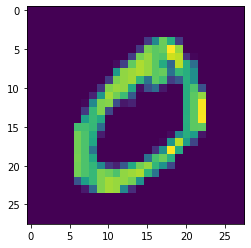

In [8]:
plt.imshow(x_train[1])
plt.show()

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

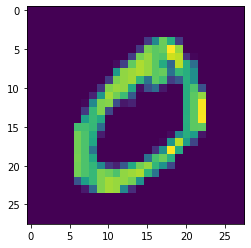

In [10]:
plt.imshow(x_train[1])
plt.show()

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2805 - accuracy: 0.9189 - val_loss: 0.1204 - val_accuracy: 0.9637
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1148 - accuracy: 0.9645 - val_loss: 0.1082 - val_accuracy: 0.9682
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0799 - val_accuracy: 0.9787
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9861 - val_loss: 0.0914 - val_accuracy: 0.9758
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.1010 - val_accuracy: 0.9733
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0992 - val_accuracy:

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


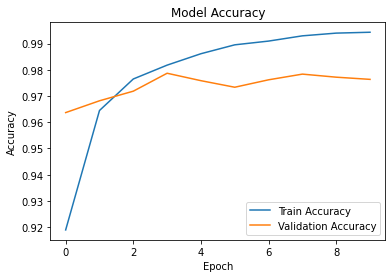

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

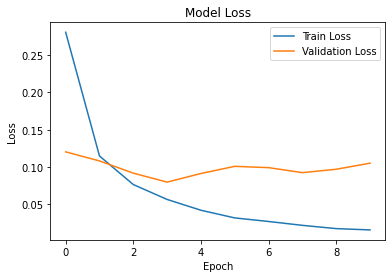

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9738
Test Loss: 0.11065837740898132
Test Accuracy: 0.973800003528595


1


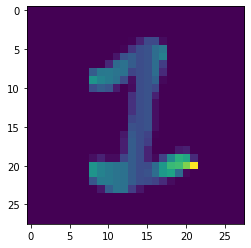

In [20]:
import random
random_choice = random.randrange(len(x_test))
test = model.predict(x_test)
print(np.argmax(test[random_choice]))
plt.imshow(x_test[random_choice])
plt.show()